In [1]:
import numpy as np
import matplotlib.pyplot as plt

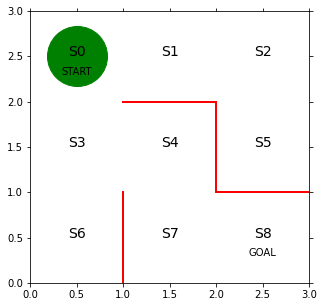

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

xpos = [0.5, 1.5, 2.5]
ypos = [2.5, 1.5, 0.5]
for y in range(3):
    for x in range(3):
        plt.text(xpos[x], ypos[y], 'S' + str(y * 3 + x), size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)


In [3]:
# 上 右 下 左
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, np.nan, 1],
    [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, np.nan, np.nan, np.nan],
    [1, np.nan, np.nan, np.nan],
    [1, 1, np.nan, np.nan],
])

In [4]:
a, b = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [5]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i,:] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    return pi
    

In [6]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [7]:
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [8]:
def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s,:])]
        
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
    return action

In [9]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
    return s_next

In [10]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [11]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
    return s_a_history, Q

In [12]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while True:
    print('Episode', episode)
    
    epsilon = epsilon / 2
    
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print('Step', len(s_a_history) - 1)
    print(s_a_history)
    episode += 1
    if episode > 100:
        break

Episode 1
0.6632761878855341
Step 26
[[0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
Episode 2
2.11105961816967
Step 570
[[0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0,

--------

# Q learning

In [13]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,:] - Q[s, a]))
    return Q

In [14]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
    return s_a_history, Q

In [15]:
a, b = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1

In [16]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print('Episode', episode)
    
    epsilon = epsilon / 2
    
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print('Steps', len(s_a_history) - 1)
    
    episode += 1
    if episode > 100:
        break

Episode 1
0.10283388089418323
Steps 166
Episode 2
0.08684413464041535
Steps 40
Episode 3
0.09137638304970735
Steps 2200
Episode 4
0.08138011712151987
Steps 15290
Episode 5
0.09039065939876147
Steps 108
Episode 6
0.08978275254413186
Steps 4
Episode 7
0.0892258790822616
Steps 4
Episode 8
0.08869612527891237
Steps 4
Episode 9
0.08817022068940378
Steps 4
Episode 10
0.08762732769571038
Steps 4
Episode 11
0.08704929005948595
Steps 4
Episode 12
0.08642073624077239
Steps 4
Episode 13
0.08572907247943697
Steps 4
Episode 14
0.08496439417546127
Steps 4
Episode 15
0.08411933867915847
Steps 4
Episode 16
0.08318889806141316
Steps 4
Episode 17
0.0821702066462277
Steps 4
Episode 18
0.08106231494043097
Steps 4
Episode 19
0.0798659589913556
Steps 4
Episode 20
0.07858333205924126
Steps 4
Episode 21
0.07721786373555353
Steps 4
Episode 22
0.07577401021002916
Steps 4
Episode 23
0.07425705823565851
Steps 4
Episode 24
0.07267294441720692
Steps 4
Episode 25
0.07102809071712338
Steps 4
Episode 26
0.069329256500

In [18]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line, = ax.plot([0.5], [2.5], marker='s',
                   color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker='s',
                   color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker='s',
                   color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker='s',
                   color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker='s',
                   color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker='s',
                   color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker='s',
                   color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker='s',
                   color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker='s',
                   color=cm.jet(1.0), markersize=85)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(V), interval=200, repeat=False)
HTML(anim.to_jshtml())